## Task 4

#### 1.	Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule  data: bioresponse.csv 


#### Description from Kaggle: 

The data is in the comma separated values (CSV) format. Each row in this data set represents a molecule. 

The first column contains experimental data describing a real biological response; the molecule was seen to elicit this response (1), or not (0). 

The remaining columns represent molecular descriptors (d1 through d1776), these are caclulated properties that can capture some of the characteristics of the molecule - for example size, shape, or elemental constitution. The descriptor matrix has been normalized). 

Use 75% of the dataset to train the model, and the rest of the data to estimate its accuracy.


In [1]:
# import library 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing functions
# sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1./(1.+np.exp(-z))
    
    return s


In [4]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [5]:
# propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                                 # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [6]:
# optimize
# Gradient Descent

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs            

In [7]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array
    b -- bias, a scalar
    X -- data

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1

    return Y_prediction

In [8]:
# model

def model(X_train, Y_train, X_test, Y_test, optimization_algorithm, num_iterations = 2000,
          learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function we've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimization_algorithm(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    print("train accuracy: {} %".format(train_accuracy))
    print("test accuracy: {} %".format(test_accuracy))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d, train_accuracy, test_accuracy

In [9]:
#loading the data
data = pd.read_csv("bioresponse.csv")

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB


In [11]:
X = np.array(data.drop('Activity', axis=1))
Y = np.array(data['Activity'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

X_train = X_train.T
Y_train = Y_train.reshape((1, -1))

X_test = X_test.T
Y_test = Y_test.reshape((1, -1))

#### 2.	Modify optimize() function to implement the stochastic gradient descent (SGD) method and Adam optimization method using the numpy library. Apply them to solve the problem from p.1.

In the case of mini-batch gradient descent, popular batch sizes include 32, 64, and 128 samples. You may see these values used in models in the literature and in tutorials.

In [12]:
# Stochastic gradient descent

def optimize_sgd_batch(w, b, X, Y, num_iterations, learning_rate, print_cost=True):
    
    # List to store the cost at every 100 iterations
    costs = []
    batch_size=32
    
    # Loop through the specified number of iterations
    for i in range(num_iterations):
        
        # Iterate through the training data in mini-batches of the specified batch size
        for start in range(0, X.shape[1], batch_size):
            stop = start + batch_size
            
            # Extract mini-batch of input and output data
            X_batch = X[:, start:stop]
            Y_batch = Y[:, start:stop]
            
            # Compute gradients and current cost for the current mini-batch
            grads, cost = propagate(w, b, X_batch, Y_batch)
            
            # Extract gradients for weight and bias from the gradients dictionary
            dw = grads['dw']
            db = grads['db']
            
            # Update weight and bias using the learning rate and computed gradients
            w -= learning_rate * dw
            b -= learning_rate * db
        
        # Calculate cost for the entire training data and store it for analysis
        _, cost = propagate(w, b, X, Y)
        if i % 100 == 0:
            costs.append(cost[0])
        
        # Print cost at every 100 iterations if print_cost is True
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.5f}'.format(i, cost[0]))
    
    # Store the updated parameters and gradients in dictionaries for return
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs

In [13]:
# Adam

def optimize_adam(w, b, X, Y, num_iterations, learning_rate, print_cost=False, beta1=0.9, beta2=0.999, epsilon=1e-8):

    # List to store the cost at every 100 iterations
    costs = []

    # Initialize first moment estimates for weights and bias
    m_dw, m_db = 0, 0

    # Initialize second moment estimates for weights and bias
    v_dw, v_db = 0, 0

    # Initialize time step
    t = 1

    # Loop through the specified number of iterations
    for i in range(num_iterations):
        t += 1 # Increment time step

        # Compute gradients and current cost
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # Update moving averages for gradients
        m_dw = (beta1 * m_dw) + ((1 - beta1) * dw)
        m_db = (beta1 * m_db) + ((1 - beta1) * db)

        # Update moving averages for squared gradients
        v_dw = (beta2 * v_dw) + ((1 - beta2) * (dw ** 2))
        v_db = (beta2 * v_db) + ((1 - beta2) * (db ** 2))
        
        # Bias correction for moving averages
        m_dw_corrected = m_dw / (1 - beta1 ** t)
        m_db_corrected = m_db / (1 - beta1 ** t)
        v_dw_corrected = v_dw / (1 - beta2 ** t)
        v_db_corrected = v_db / (1 - beta2 ** t)

        # Update parameters using Adam optimization formula
        w -= learning_rate * m_dw_corrected / (np.sqrt(v_dw_corrected) + epsilon)
        b -= learning_rate * m_db_corrected / (np.sqrt(v_db_corrected) + epsilon)

        # Store cost at every 100 iterations
        if i % 100 == 0:
            costs.append(cost[0])

        # Print cost at every 100 iterations if print_cost is True
        if print_cost and i % 100 == 0:
            print('Cost after {} iteration: {:.5f}'.format(i, cost[0]))

    # Store the updated parameters and gradients in dictionaries for return
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}

    return params, grads, costs

#### 3.	For three modifications of gradient descent (GD, SGD and Adam) plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 

In [14]:
learning_rates_list = [0.1, 0.05, 0.01, 0.005, 0.001]

In [15]:
# Gradient descent

optimize_list = []
train_accuracies = []
test_accuracies = []

for i in learning_rates_list:
    print(f"Learning_Rates {i}")
    optimize_lr = model(
        X_train, 
        Y_train, 
        X_test, 
        Y_test, 
        optimization_algorithm=optimize, 
        learning_rate=i, 
        print_cost=False,
    )
    optimize_list.append(optimize_lr[0])
    train_accuracies.append(optimize_lr[1])
    test_accuracies.append(optimize_lr[2])
optimize_lr_results = list(zip(train_accuracies, test_accuracies))    

Learning_Rates 0.1
train accuracy: 83.32740846071809 %
test accuracy: 76.43923240938166 %
Learning_Rates 0.05
train accuracy: 82.26093138997511 %
test accuracy: 76.97228144989339 %
Learning_Rates 0.01
train accuracy: 78.35051546391753 %
test accuracy: 75.5863539445629 %
Learning_Rates 0.005
train accuracy: 77.10629221471739 %
test accuracy: 74.73347547974413 %
Learning_Rates 0.001
train accuracy: 72.52044081052257 %
test accuracy: 72.70788912579957 %


In [16]:
# Stochastic gradient descent

optimize_sgd_batch_list = []
train_accuracies = []
test_accuracies = []

for i in learning_rates_list:
    print(f"Learning_Rates {i}")
    optimize_sgd_batch_lr = model(
        X_train, 
        Y_train, 
        X_test, 
        Y_test, 
        optimization_algorithm=optimize_sgd_batch, 
        learning_rate=i, 
        print_cost=False,
    )
    optimize_sgd_batch_list.append(optimize_sgd_batch_lr[0])
    train_accuracies.append(optimize_sgd_batch_lr[1])
    test_accuracies.append(optimize_sgd_batch_lr[2])
optimize_sgd_batch_results = list(zip(train_accuracies, test_accuracies))    

Learning_Rates 0.1
train accuracy: 92.92570209740491 %
test accuracy: 73.77398720682302 %
Learning_Rates 0.05
train accuracy: 91.75257731958763 %
test accuracy: 75.05330490405117 %
Learning_Rates 0.01
train accuracy: 88.05545680767864 %
test accuracy: 75.5863539445629 %
Learning_Rates 0.005
train accuracy: 86.88233202986136 %
test accuracy: 75.69296375266525 %
Learning_Rates 0.001
train accuracy: 83.22076075364379 %
test accuracy: 76.33262260127933 %


In [17]:
# ADAM

optimize_adam_list = []
train_accuracies = []
test_accuracies = []

for i in learning_rates_list:
    print(f"Learning_Rates {i}")
    optimize_adam_lr = model(
        X_train, 
        Y_train, 
        X_test, 
        Y_test, 
        optimization_algorithm=optimize_adam, 
        learning_rate=i, 
        print_cost=False,
    )
    optimize_adam_list.append(optimize_adam_lr[0])
    train_accuracies.append(optimize_adam_lr[1])
    test_accuracies.append(optimize_adam_lr[2])
optimize_adam_results = list(zip(train_accuracies, test_accuracies))    

Learning_Rates 0.1
train accuracy: 95.73409171702808 %
test accuracy: 70.8955223880597 %
Learning_Rates 0.05
train accuracy: 95.52079630287949 %
test accuracy: 71.32196162046908 %
Learning_Rates 0.01
train accuracy: 94.91645929612514 %
test accuracy: 72.38805970149254 %
Learning_Rates 0.005
train accuracy: 94.24102381798791 %
test accuracy: 73.56076759061834 %
Learning_Rates 0.001
train accuracy: 89.90401706363313 %
test accuracy: 75.69296375266525 %


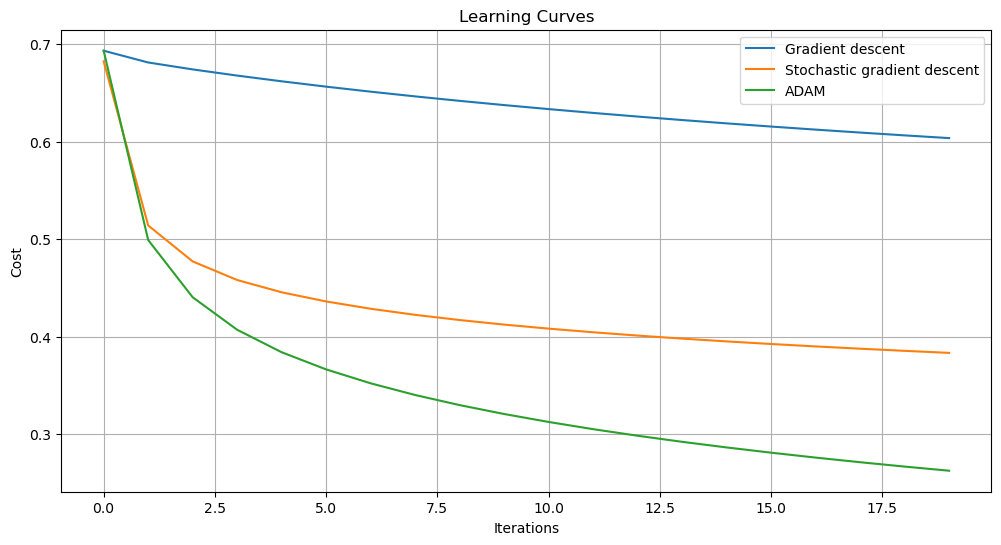

In [18]:
# Plot learning curves for three modifications of gradient descent (GD, SGD and Adam)
plt.figure(figsize=(12, 6))
plt.plot(pd.DataFrame(optimize_list)["costs"][4], label="Gradient descent")
plt.plot(pd.DataFrame(optimize_sgd_batch_list)["costs"][4], label="Stochastic gradient descent")
plt.plot(pd.DataFrame(optimize_adam_list)["costs"][4], label="ADAM")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Curves")
plt.legend()
plt.grid(True)
plt.show()

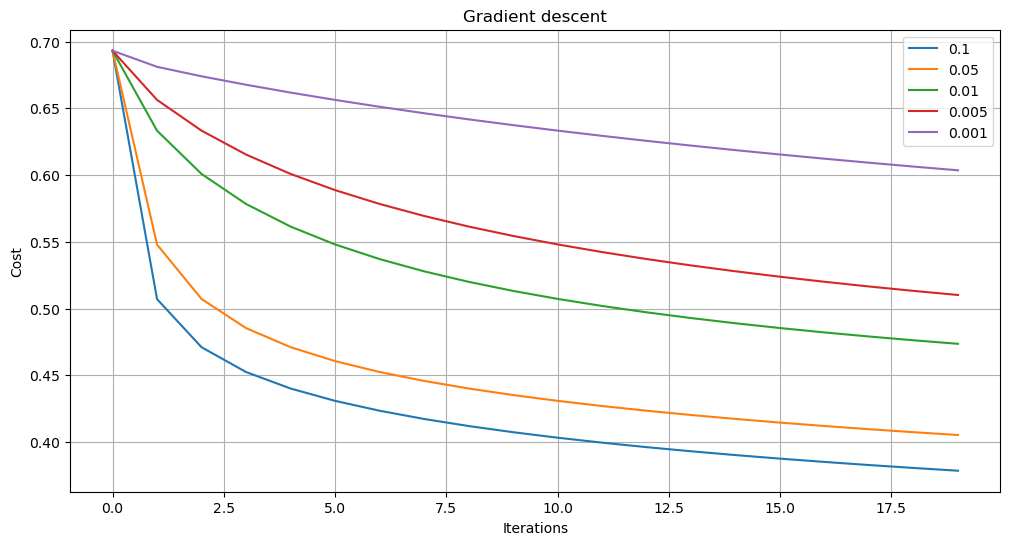

In [19]:
# Plot learning curves for Gradient descent
plt.figure(figsize=(12, 6))
plt.plot(pd.DataFrame(optimize_list)["costs"][0], label="0.1")
plt.plot(pd.DataFrame(optimize_list)["costs"][1], label="0.05")
plt.plot(pd.DataFrame(optimize_list)["costs"][2], label="0.01")
plt.plot(pd.DataFrame(optimize_list)["costs"][3], label="0.005")
plt.plot(pd.DataFrame(optimize_list)["costs"][4], label="0.001")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient descent")
plt.legend()
plt.grid(True)
plt.show()

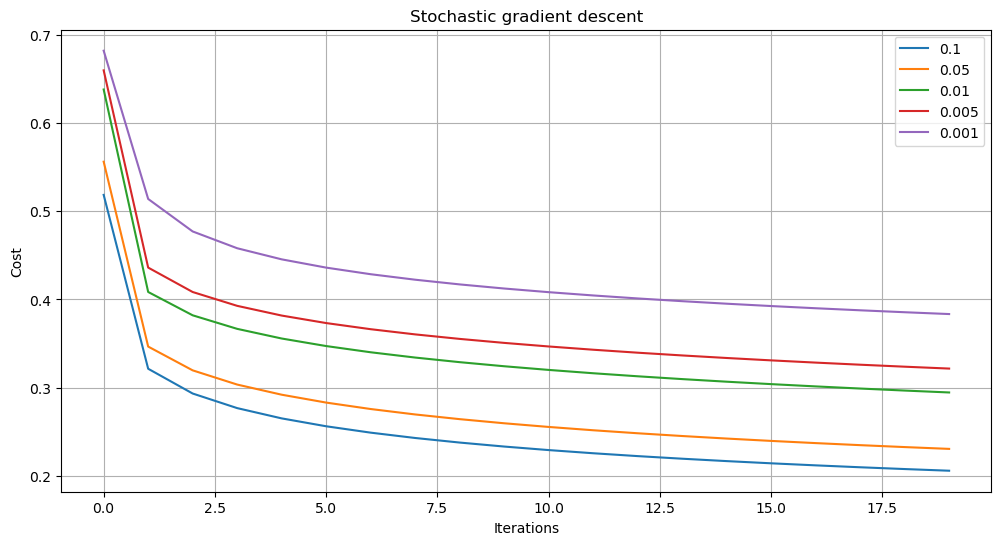

In [20]:
# Plot learning curves for Stochastic gradient descent
plt.figure(figsize=(12, 6))
plt.plot(pd.DataFrame(optimize_sgd_batch_list)["costs"][0], label="0.1")
plt.plot(pd.DataFrame(optimize_sgd_batch_list)["costs"][1], label="0.05")
plt.plot(pd.DataFrame(optimize_sgd_batch_list)["costs"][2], label="0.01")
plt.plot(pd.DataFrame(optimize_sgd_batch_list)["costs"][3], label="0.005")
plt.plot(pd.DataFrame(optimize_sgd_batch_list)["costs"][4], label="0.001")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Stochastic gradient descent")
plt.legend()
plt.grid(True)
plt.show()

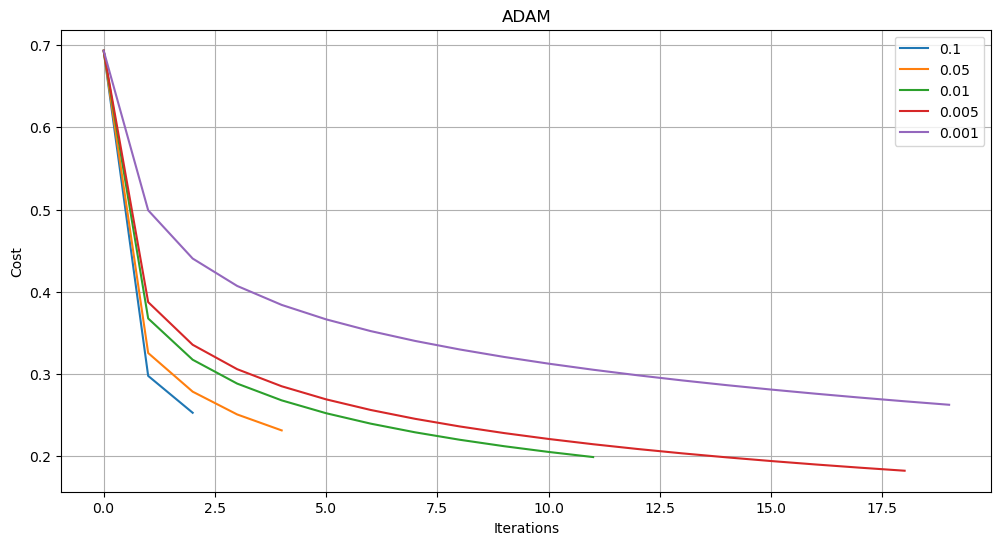

In [21]:
# Plot learning curves for ADAM
plt.figure(figsize=(12, 6))
plt.plot(pd.DataFrame(optimize_adam_list)["costs"][0], label="0.1")
plt.plot(pd.DataFrame(optimize_adam_list)["costs"][1], label="0.05")
plt.plot(pd.DataFrame(optimize_adam_list)["costs"][2], label="0.01")
plt.plot(pd.DataFrame(optimize_adam_list)["costs"][3], label="0.005")
plt.plot(pd.DataFrame(optimize_adam_list)["costs"][4], label="0.001")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("ADAM")
plt.legend()
plt.grid(True)
plt.show()

#### 4.	Compare the accuracy of the models fitted with various BP algorithms.

In [22]:
# Result Gradient descent
Gradient_descent_results = pd.DataFrame(optimize_lr_results, index = ['0.1', '0.05', '0.01', '0.005', '0.001'],\
             columns = ['train accuracy', 'test accuracy'])
Gradient_descent_results

,train accuracy,test accuracy
0.1,83.327408,76.439232
0.05,82.260931,76.972281
0.01,78.350515,75.586354
0.005,77.106292,74.733475
0.001,72.520441,72.707889


In [23]:
# Stochastic gradient descent
Stochastic_gradient_descent_results = pd.DataFrame(optimize_sgd_batch_results, index = ['0.1', '0.05', '0.01', '0.005', '0.001'],\
             columns = ['train accuracy', 'test accuracy'])
Stochastic_gradient_descent_results

,train accuracy,test accuracy
0.1,92.925702,73.773987
0.05,91.752577,75.053305
0.01,88.055457,75.586354
0.005,86.882332,75.692964
0.001,83.220761,76.332623


In [24]:
# ADAM
ADAM_results = pd.DataFrame(optimize_adam_results, index = ['0.1', '0.05', '0.01', '0.005', '0.001'],\
             columns = ['train accuracy', 'test accuracy'])
ADAM_results

,train accuracy,test accuracy
0.1,95.734092,70.895522
0.05,95.520796,71.321962
0.01,94.916459,72.388060
0.005,94.241024,73.560768
0.001,89.904017,75.692964
